# Exploratory Data Analysis
Find relationships in the data between the columns

## 1. STARTING AND FINISHING

Firsly let's have a look at the dependency between qualifying and race finishing positions. You can imagine that the higher you qualify the higher the chance of finishing top.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import LogNorm

It appears there is a starting grid position 0. This seems to indicate pit-lane start or a DNQ (so no race participation), not an ordinary grid start.

In [3]:
results = pd.read_csv('f1_dataset/results_fixed.csv')
zero_grid = results.loc[results['grid'] == 0]
zero_grid.head(5)

,Unnamed: 0,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
2281,2281,2282,127,62,18,22,0,-1,F,22,0.0,0,\N,\N,\N,\N,\N,\N,77
2432,2432,2433,134,49,21,20,0,-1,F,20,0.0,0,\N,\N,\N,\N,\N,\N,81
2433,2433,2434,134,59,21,21,0,-1,F,21,0.0,0,\N,\N,\N,\N,\N,\N,81
2434,2434,2435,134,21,17,9,0,-1,F,22,0.0,0,\N,\N,\N,\N,\N,\N,82
2797,2797,2798,151,58,18,20,0,-1,F,22,0.0,0,\N,\N,\N,\N,\N,\N,77


In [4]:
start_finish = results.drop(results[results.grid == 0].index)
start_finish.info()

<class 'pandas.core.frame.DataFrame'>
Index: 24464 entries, 0 to 26079
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Unnamed: 0       24464 non-null  int64  
 1   resultId         24464 non-null  int64  
 2   raceId           24464 non-null  int64  
 3   driverId         24464 non-null  int64  
 4   constructorId    24464 non-null  int64  
 5   number           24464 non-null  object 
 6   grid             24464 non-null  int64  
 7   position         24464 non-null  int64  
 8   positionText     24464 non-null  object 
 9   positionOrder    24464 non-null  int64  
 10  points           24464 non-null  float64
 11  laps             24464 non-null  int64  
 12  time             24464 non-null  object 
 13  milliseconds     24464 non-null  object 
 14  fastestLap       24464 non-null  object 
 15  rank             24464 non-null  object 
 16  fastestLapTime   24464 non-null  object 
 17  fastestLapSpeed  

**Insight 1:**
The most probable outcome is that a driver starting on pole will finish first. This has happened 464 times in the dataset, or 1.897% of all driver outcomes result in pole-to-win conversion.

**Insight 2:**
Drivers starting at the back are extremely likely to not finish the race. About 15% of all the results comes from drivers who started in the second half and DNFd.

In [5]:
start_finish_grouped = start_finish.groupby(['grid','position']).size().reset_index(name='count')
start_finish_grouped['percentage'] = start_finish_grouped['count'].div(start_finish_grouped['count'].sum()/100)
start_finish_grouped.sort_values(by='count',ascending=False).head(10)

,grid,position,count,percentage
1,1,1,464,1.896664
339,17,-1,446,1.823087
292,15,-1,437,1.786298
269,14,-1,435,1.778123
361,18,-1,434,1.774035
406,20,-1,428,1.749509
246,13,-1,427,1.745422
316,16,-1,427,1.745422
182,10,-1,424,1.733159
384,19,-1,423,1.729071


In [6]:
# to plot the data as a heat map we need to pivot the three columns into a 2D matrix
pivoted = start_finish_grouped.pivot(index='position', columns='grid', values='count')
# then caluctae percetage likelihood of a finishing position for each starting grid (i.e. go by columns)
pivoted = pivoted.apply(lambda iterator: (100*iterator/iterator.sum()).round(2))
pivoted.head()

grid,1,2,3,4,5,6,7,8,9,10,...,25,26,27,28,29,30,31,32,33,34
position,,,,,,,,,,,,,,,,,,,,,
-1,23.68,24.91,27.28,29.78,32.88,33.55,33.61,34.52,34.61,38.69,...,55.48,60.48,69.57,53.33,60.0,73.68,50.00,35.29,23.08,100.0
1,42.11,23.72,12.23,6.01,4.37,3.57,2.09,1.55,0.46,1.09,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,14.16,20.51,18.25,13.84,8.56,6.51,4.81,3.29,3.37,1.64,...,0.33,NaN,NaN,NaN,NaN,NaN,NaN,5.88,NaN,NaN
3,6.72,10.99,15.97,13.93,11.93,8.62,6.36,5.39,4.74,3.10,...,NaN,1.21,NaN,3.33,NaN,NaN,NaN,NaN,NaN,NaN
4,4.26,5.31,8.30,11.66,12.39,9.90,7.27,7.95,7.38,4.01,...,NaN,0.81,NaN,NaN,NaN,NaN,5.56,NaN,7.69,NaN


(0.0, 25.0)

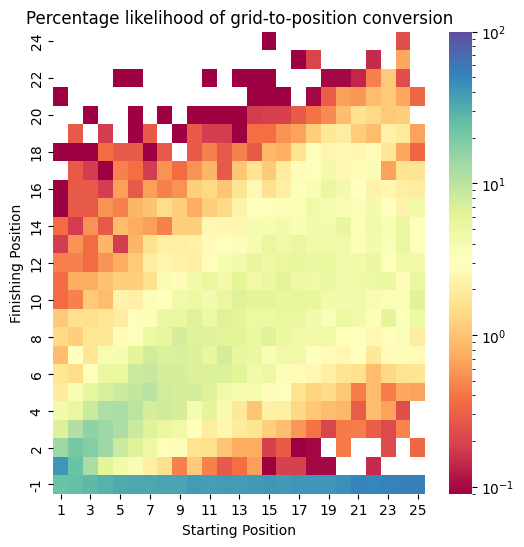

In [7]:
annot = False
cmap = "Spectral"
plt.figure(figsize=(6,6))
sns.heatmap(data=pivoted, annot=annot,cmap=cmap,vmin = 0, vmax=50, norm=LogNorm())
plt.ylabel('Finishing Position')
plt.xlabel('Starting Position')
plt.title('Percentage likelihood of grid-to-position conversion')
plt.xlim([0,25])
plt.ylim([0, 25])


In the event that the driver does finish the race - DNF excluding - what is the most likely position for each starting grid for all drivers.

/var/folders/4z/0b31nkj9457081mx9h796b240000gn/T/ipykernel_1201/777083655.py:2: FutureWarning: The behavior of DataFrame.idxmax with all-NA values, or any-NA and skipna=False, is deprecated. In a future version this will raise ValueError
  a = pivoted.drop(-1).idxmax(axis=0,skipna=True,numeric_only=True).to_frame().reset_index().rename(columns={"grid": "starting", 0: "finishing"})


Text(0.5, 1.0, 'Most likely finishing position for each grid start. Correlation = 0.86')

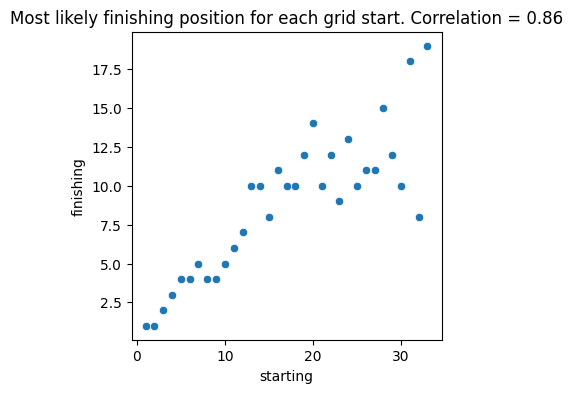

In [8]:
# dropping label -1 and finidng most common
a = pivoted.drop(-1).idxmax(axis=0,skipna=True,numeric_only=True).to_frame().reset_index().rename(columns={"grid": "starting", 0: "finishing"})
corr = a.corr()
corr_num = corr['starting'].iloc[1]
plt.figure(figsize=(4,4))
sns.scatterplot(data = a, x = 'starting', y = 'finishing')
plt.title('Most likely finishing position for each grid start. Correlation = {}'.format(round(corr_num,2)))


### 1.1 Simple Linear Regression Model for Grid/Finish
We can probably model it as a simple linear relationship, most likely with coefficients $\beta_{0} \simeq 0$ and  $\beta_{1} \simeq 1$ Let's take a look.

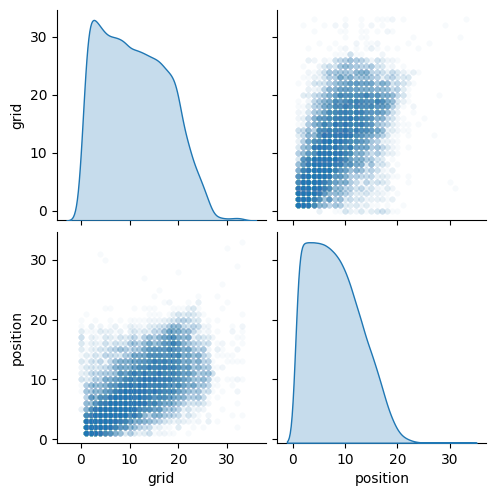

In [9]:
## we will need a couple extra libraries
import statsmodels.api as sm
from statsmodels.formula.api import ols

## select data for LR model
lr_data = results[['grid','position']]
## model only finishers for now
lr_data  = lr_data[lr_data.position != -1]
## plot relationship between data

sns.pairplot(lr_data,diag_kind='kde',plot_kws={"s": 20,"alpha":0.03});


This data isn't perfect for linear regression due to multiple reasons. 
- The data points are not independent - given that they fall out of the same races, e.g. one driver finishing 2nd prevents any other driver from finishing 2nd.
- The data doesn't appear to be normally distributed, more of uniform distribution with some leakage at the far end due to scarcity of data.

However there seems to be some degree of positive correlation between grid and position. Which is a plus.

In [10]:
# Set a oridnary least squares formula
ols_formula = 'position ~ grid'
# create a model
OLS = ols(formula = ols_formula, data = lr_data)
# fit the model
model = OLS.fit()
# display model results
model_results = model.summary()
print(model_results)

                            OLS Regression Results                            
Dep. Variable:               position   R-squared:                       0.411
Model:                            OLS   Adj. R-squared:                  0.411
Method:                 Least Squares   F-statistic:                 1.061e+04
Date:                Sun, 02 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:51:33   Log-Likelihood:                -41461.
No. Observations:               15207   AIC:                         8.293e+04
Df Residuals:                   15205   BIC:                         8.294e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.9071      0.058     50.520      0.0

Rather surprisingly we see that:
- $\beta_{0} \simeq 2.9$ and  $\beta_{1} \simeq 0.46$. That is drop in a single grid postion translates into a drop of about 0.5 positions.
- This model is too simple. The R-squared metric of 0.41 shows that this model explains less than a half of the data's variance! There is more to uncover!

**Now check for other model assumptions**

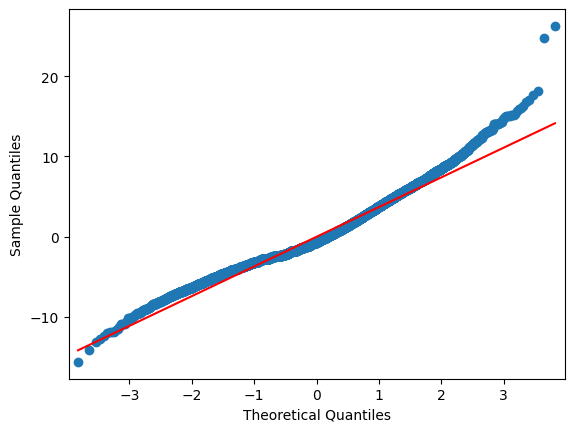

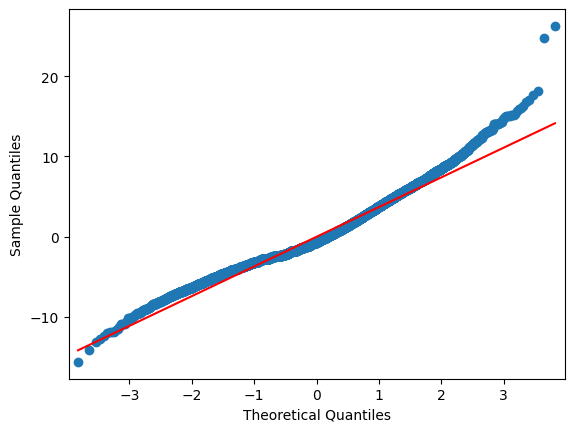

In [11]:
# get residuals from the model
residuals = model.resid
# residuals
# look for normality - all residuals should be normaly distribited. Best visualised by a qq plot
sm.qqplot(residuals, line='s')

<Axes: xlabel='None', ylabel='None'>

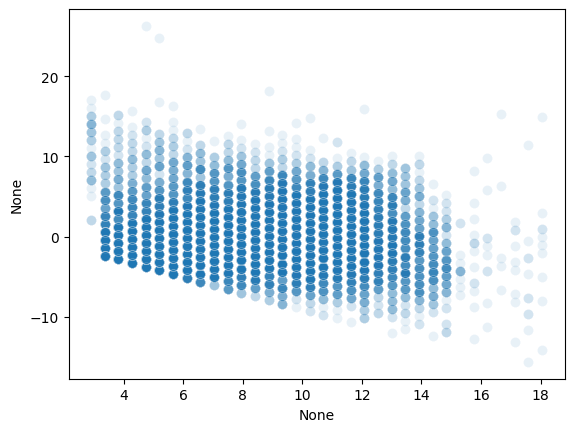

In [12]:
# check for homoscedasticity
sns.scatterplot(x = model.fittedvalues, y = model.resid, alpha = 0.1, s = 50)

So to recap:
- Data points are not independent
- Data is not normally distributed
- There is a vague correlation between dependent and independent variables
- Data residuals are roughly normally distributed
- Data residuals have a varying variance
- the r-squared value is quite low

**Overall this is a fairly poor model.** more work will be done in the next notebook where we come to building proper models.

## 2. CHAMPIONSHIP WINNING PATTERN
Looking at how has the championship winning driver performed in his championship winning season and the season after. From each season pull out the quali and finishing positions for the championship winner

In [13]:
# this dataframe will hold info about race order in any given season
races = pd.read_csv('f1_dataset/races.csv')
# this dataframe will hold info about the championship winner
driver_stand = pd.read_csv('f1_dataset/driver_standings.csv')
# will also resue the previous results dataframe to find starting and finishing positions
races.head(5)

,raceId,year,round,circuitId,name,date,time,url,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,2009,1,1,Australian Grand Prix,2009-03-29,06:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,2,2009,2,2,Malaysian Grand Prix,2009-04-05,09:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,3,2009,3,17,Chinese Grand Prix,2009-04-19,07:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,4,2009,4,3,Bahrain Grand Prix,2009-04-26,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,5,2009,5,4,Spanish Grand Prix,2009-05-10,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N


### for each year find the winner

In [14]:
# merge race data with point scorers
races_points = pd.merge(races, driver_stand, how='left', left_on = ['raceId'], right_on = ['raceId'])
# group by years and get max value of points
# here we make an assumption that you cannot get negative points and that raceId go up with actual round numbers
# because we select max points and max raceId, we assume that driver winning the championship has maximum points on their last race
# if negative points were possible, he could have max points on an earlier race
grouped_year_raceid = races_points.groupby(['year'])[['points','raceId']].max().reset_index().rename(columns={'points':'maxPoints'})
season_winner = pd.merge(grouped_year_raceid,driver_stand,how='left', left_on = ['raceId','maxPoints'], right_on = ['raceId','points'])
# manually add Max as the winner of the 2023 season
season_winner.loc[73,'driverId'] = 830
season_winner.head(10)

,year,maxPoints,raceId,driverStandingsId,driverId,points,position,positionText,wins
0,1950,30.0,839,43539.0,642.0,30.0,1.0,1,3.0
1,1951,31.0,832,44049.0,579.0,31.0,1.0,1,3.0
2,1952,36.0,824,44669.0,647.0,36.0,1.0,1,6.0
3,1953,34.5,816,45286.0,647.0,34.5,1.0,1,5.0
4,1954,42.0,807,52049.0,579.0,42.0,1.0,1,6.0
5,1955,40.0,798,46422.0,579.0,40.0,1.0,1,4.0
6,1956,30.0,791,46912.0,579.0,30.0,1.0,1,3.0
7,1957,40.0,783,47372.0,579.0,40.0,1.0,1,4.0
8,1958,42.0,775,49585.0,578.0,42.0,1.0,1,1.0
9,1959,31.0,764,62485.0,356.0,31.0,1.0,1,2.0


### find winner's quali/win performance
for each winner find their quali and race positions for every race
year, driverId, round number, quali, finishing

In [15]:
dated_results = pd.merge(results, races[['raceId','year','round']], how='left',left_on = 'raceId', right_on = 'raceId')
winner_results = pd.merge(season_winner[['year', 'driverId', 'maxPoints']], dated_results[['driverId', 'raceId', 'grid', 'position', 'year','round']], how='left', left_on=['year','driverId'], right_on=['year','driverId'])
winner_results.head(10)

,year,driverId,maxPoints,raceId,grid,position,round
0,1950,642.0,30.0,833,1,1,1
1,1950,642.0,30.0,834,2,-1,2
2,1950,642.0,30.0,836,2,1,4
3,1950,642.0,30.0,837,1,4,5
4,1950,642.0,30.0,838,2,7,6
5,1950,642.0,30.0,839,3,1,7
6,1951,579.0,31.0,825,1,1,1
7,1951,579.0,31.0,827,1,9,3
8,1951,579.0,31.0,828,1,11,4
9,1951,579.0,31.0,829,2,2,5


Text(40.162083333333335, 0.5, 'Position')

<Figure size 500x500 with 0 Axes>

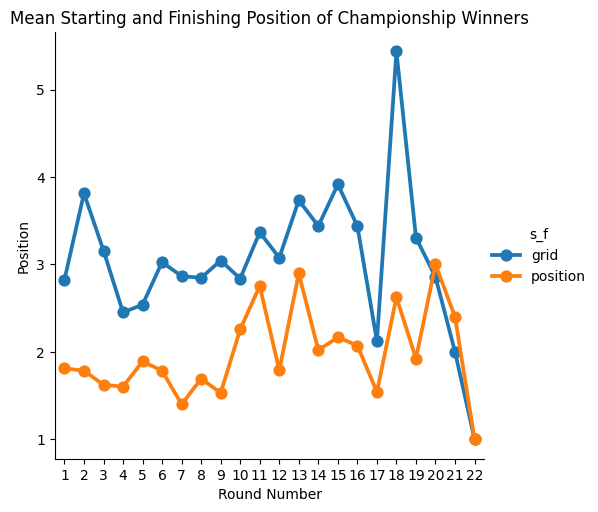

In [16]:
mean_per_round = winner_results[['round','grid','position']].groupby('round').mean().reset_index()
mean_per_round = mean_per_round.melt('round', var_name='s_f', value_name='pos')
mean_per_round.head(10)
plt.figure(figsize=(5,5))
sns.catplot(data = mean_per_round, x = 'round', y = 'pos', hue='s_f', kind='point')
plt.title('Mean Starting and Finishing Position of Championship Winners')
plt.xlabel('Round Number')
plt.ylabel('Position')

## 3. MOST DIFFICULT TO OVERTAKE TRACKS
We have the lap times data which we originally discared. We can use it to figure out how many overtakes on average happen on any track type.

In [17]:
laps = pd.read_csv('f1_dataset/lap_times.csv')
circuits = pd.read_csv('f1_dataset/circuits.csv')
laps.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 551742 entries, 0 to 551741
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype 
---  ------        --------------   ----- 
 0   raceId        551742 non-null  int64 
 1   driverId      551742 non-null  int64 
 2   lap           551742 non-null  int64 
 3   position      551742 non-null  int64 
 4   time          551742 non-null  object
 5   milliseconds  551742 non-null  int64 
dtypes: int64(5), object(1)
memory usage: 25.3+ MB


For every driver in every race, check how many times they change position. Sum them up. Since it takes two drivers to swap a postion (most often), divide the whole count by 2.


Text(0, 0.5, 'Normalised Overtakes')

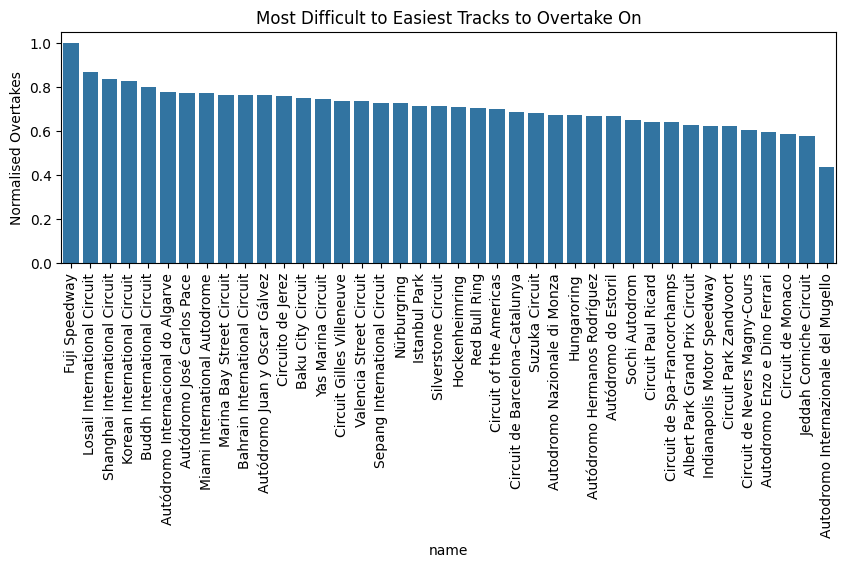

In [18]:
pos_changes = laps[['raceId','driverId','position']].groupby(['raceId','driverId']).nunique().reset_index()
total_overtakes = pos_changes[['raceId','position']].groupby(['raceId']).sum().reset_index().rename(columns={'position': 'overtakes'})
overtakes_circuit = pd.merge(total_overtakes, races[['raceId','circuitId']], how='left', left_on='raceId', right_on='raceId')
overtakes_per_circuit = overtakes_circuit[['circuitId','overtakes']].groupby('circuitId').mean().reset_index()
overtakes_per_circuit_named = pd.merge(overtakes_per_circuit, circuits[['circuitId','name']],how='left',left_on='circuitId',right_on='circuitId').sort_values('overtakes', ascending=False)
overtakes_per_circuit_named['norm_overtakes'] = overtakes_per_circuit_named['overtakes'].div(overtakes_per_circuit_named['overtakes'].max())
plt.figure(figsize=(10,3))
sns.barplot(data = overtakes_per_circuit_named, x='name', y='norm_overtakes')
plt.xticks(rotation=90)
plt.title('Most Difficult to Easiest Tracks to Overtake On')
plt.ylabel('Normalised Overtakes')
# overtakes_per_circuit_named.head(10)

In [19]:
# save difficulty of the track
circuit_diff = pd.merge(circuits,overtakes_per_circuit_named,how='left',left_on='circuitId',right_on='circuitId')
circuit_diff.to_csv('f1_dataset/circuits_more.csv')

## 4. DOES AGE MATTER
Lets look at age/quali/finishing position distribution

In [20]:
drivers = pd.read_csv('f1_dataset/drivers.csv')
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   driverId     857 non-null    int64 
 1   driverRef    857 non-null    object
 2   number       857 non-null    object
 3   code         857 non-null    object
 4   forename     857 non-null    object
 5   surname      857 non-null    object
 6   dob          857 non-null    object
 7   nationality  857 non-null    object
 8   url          857 non-null    object
dtypes: int64(1), object(8)
memory usage: 60.4+ KB


In [21]:
drivers['dob'] = pd.to_datetime(drivers['dob'])
drivers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 857 entries, 0 to 856
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype         
---  ------       --------------  -----         
 0   driverId     857 non-null    int64         
 1   driverRef    857 non-null    object        
 2   number       857 non-null    object        
 3   code         857 non-null    object        
 4   forename     857 non-null    object        
 5   surname      857 non-null    object        
 6   dob          857 non-null    datetime64[ns]
 7   nationality  857 non-null    object        
 8   url          857 non-null    object        
dtypes: datetime64[ns](1), int64(1), object(7)
memory usage: 60.4+ KB


Find age of the drivers for every race. Then pivot the table to show normalised counts for each combo of driver age and starting position.

In [22]:
dated_races = pd.merge(races[['raceId','year']], results[['raceId','driverId','grid','position']], how='left',left_on='raceId',right_on='raceId')
age_position = pd.merge(dated_races[['driverId','year','grid','position']], drivers[['driverId','dob']], how='left',left_on='driverId',right_on='driverId')
age_position['dob_year'] = age_position['dob'].dt.year
age_position['age'] = age_position['year'] - age_position['dob_year']
age_grid_count = age_position[['grid','age']].groupby(['grid','age']).value_counts().reset_index()
age_grid_count = age_grid_count.pivot(index='grid', columns='age', values='count')
age_grid_count = age_grid_count.apply(lambda iterator: (100*iterator/iterator.sum()).round(2))

Text(0.5, 1.0, 'Age vs Starting Grid Distribution')

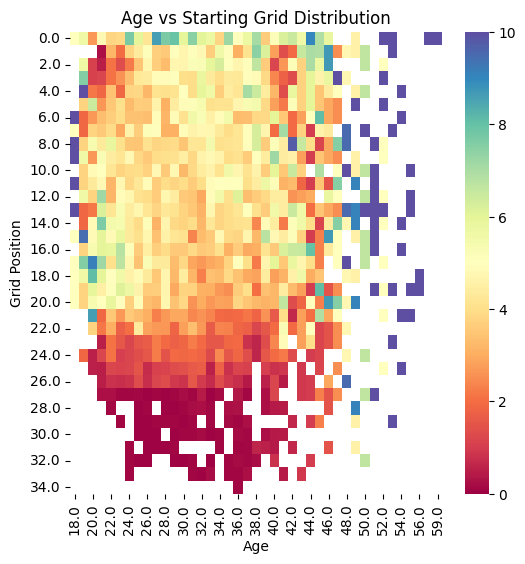

In [23]:
annot = False
cmap = "Spectral"
plt.figure(figsize=(6,6))
sns.heatmap(data=age_grid_count, annot=annot,cmap=cmap,vmin = 0, vmax = 10)
plt.ylabel('Grid Position')
plt.xlabel('Age')
plt.title('Age vs Starting Grid Distribution')

Reapeat the same for finishing position.

In [24]:
age_finish_count = age_position[['position','age']].groupby(['position','age']).value_counts().reset_index()
age_finish_count = age_finish_count.pivot(index='position', columns='age', values='count')
age_finish_count = age_finish_count.apply(lambda iterator: (100*iterator/iterator.sum()).round(2))

Text(0.5, 1.0, 'Age vs Finish Distribution')

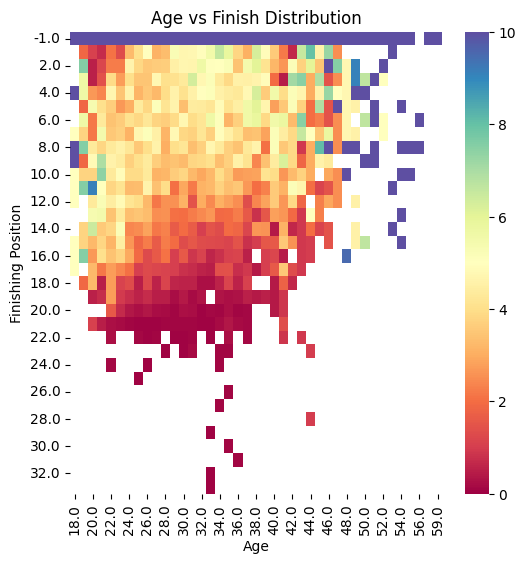

In [25]:
annot = False
cmap = "Spectral"
plt.figure(figsize=(6,6))
sns.heatmap(data=age_finish_count, annot=annot,cmap=cmap,vmin = 0, vmax = 10)
plt.ylabel('Finishing Position')
plt.xlabel('Age')
plt.title('Age vs Finish Distribution')

**Insight** Visual inspection seems to indicate that age does not matter. In both graphs we see a fairly uniform distribution of age and starting/finishing position.

## 5. HISTORIC PERFORMANCE
in other words if the driver came xth, yth etc in the last z races, does that inform of where he might be coming in this race?

For this I will need extra columns in the results dataset. pos_m1 to pos_m5 will hold the finishing position for that particular driver from 1 to 5 races ago.

In [26]:
# 1. find the previour raceId for a given race
races_sorted = races.sort_values(by=['year','round'])
for i in range(5):
    races_sorted['raceId_m'+str(i+1)] = races_sorted['raceId'].shift(i+1)

# 2. add the info to the results table so we can join the table on itself
results_prev_races = pd.merge(results, races_sorted[['raceId','raceId_m1','raceId_m2','raceId_m3','raceId_m4','raceId_m5']], how='left', left_on='raceId',right_on='raceId')
results_historic = results_prev_races[['raceId','grid','position','driverId','raceId_m1','raceId_m2','raceId_m3','raceId_m4','raceId_m5']]

# 3. self join
for i in range(5):
    results_historic = pd.merge(results_historic, results_historic[['raceId','driverId','position']], how='left',left_on=['raceId_m'+str(i+1),'driverId'],right_on=['raceId','driverId'], suffixes = ('', '_m'+str(i+1)))

features_for_later = results_historic.copy()

# 4. trim data
results_historic = results_historic[['grid','position','position_m1','position_m2','position_m3','position_m4','position_m5']]
results_historic  = results_historic[results_historic.position != -1]
results_historic  = results_historic[results_historic.position_m1 != -1]
results_historic  = results_historic[results_historic.position_m2 != -1]
results_historic  = results_historic[results_historic.position_m3 != -1]
results_historic  = results_historic[results_historic.position_m4 != -1]
results_historic  = results_historic[results_historic.position_m5 != -1]
results_historic = results_historic.dropna(axis=0)
results_historic.head()

,grid,position,position_m1,position_m2,position_m3,position_m4,position_m5
1,5,2,6.0,7.0,14.0,5.0,4.0
7,15,8,1.0,1.0,3.0,1.0,3.0
22,2,1,8.0,1.0,1.0,3.0,1.0
27,5,6,2.0,6.0,7.0,14.0,5.0
45,4,2,1.0,8.0,1.0,1.0,3.0


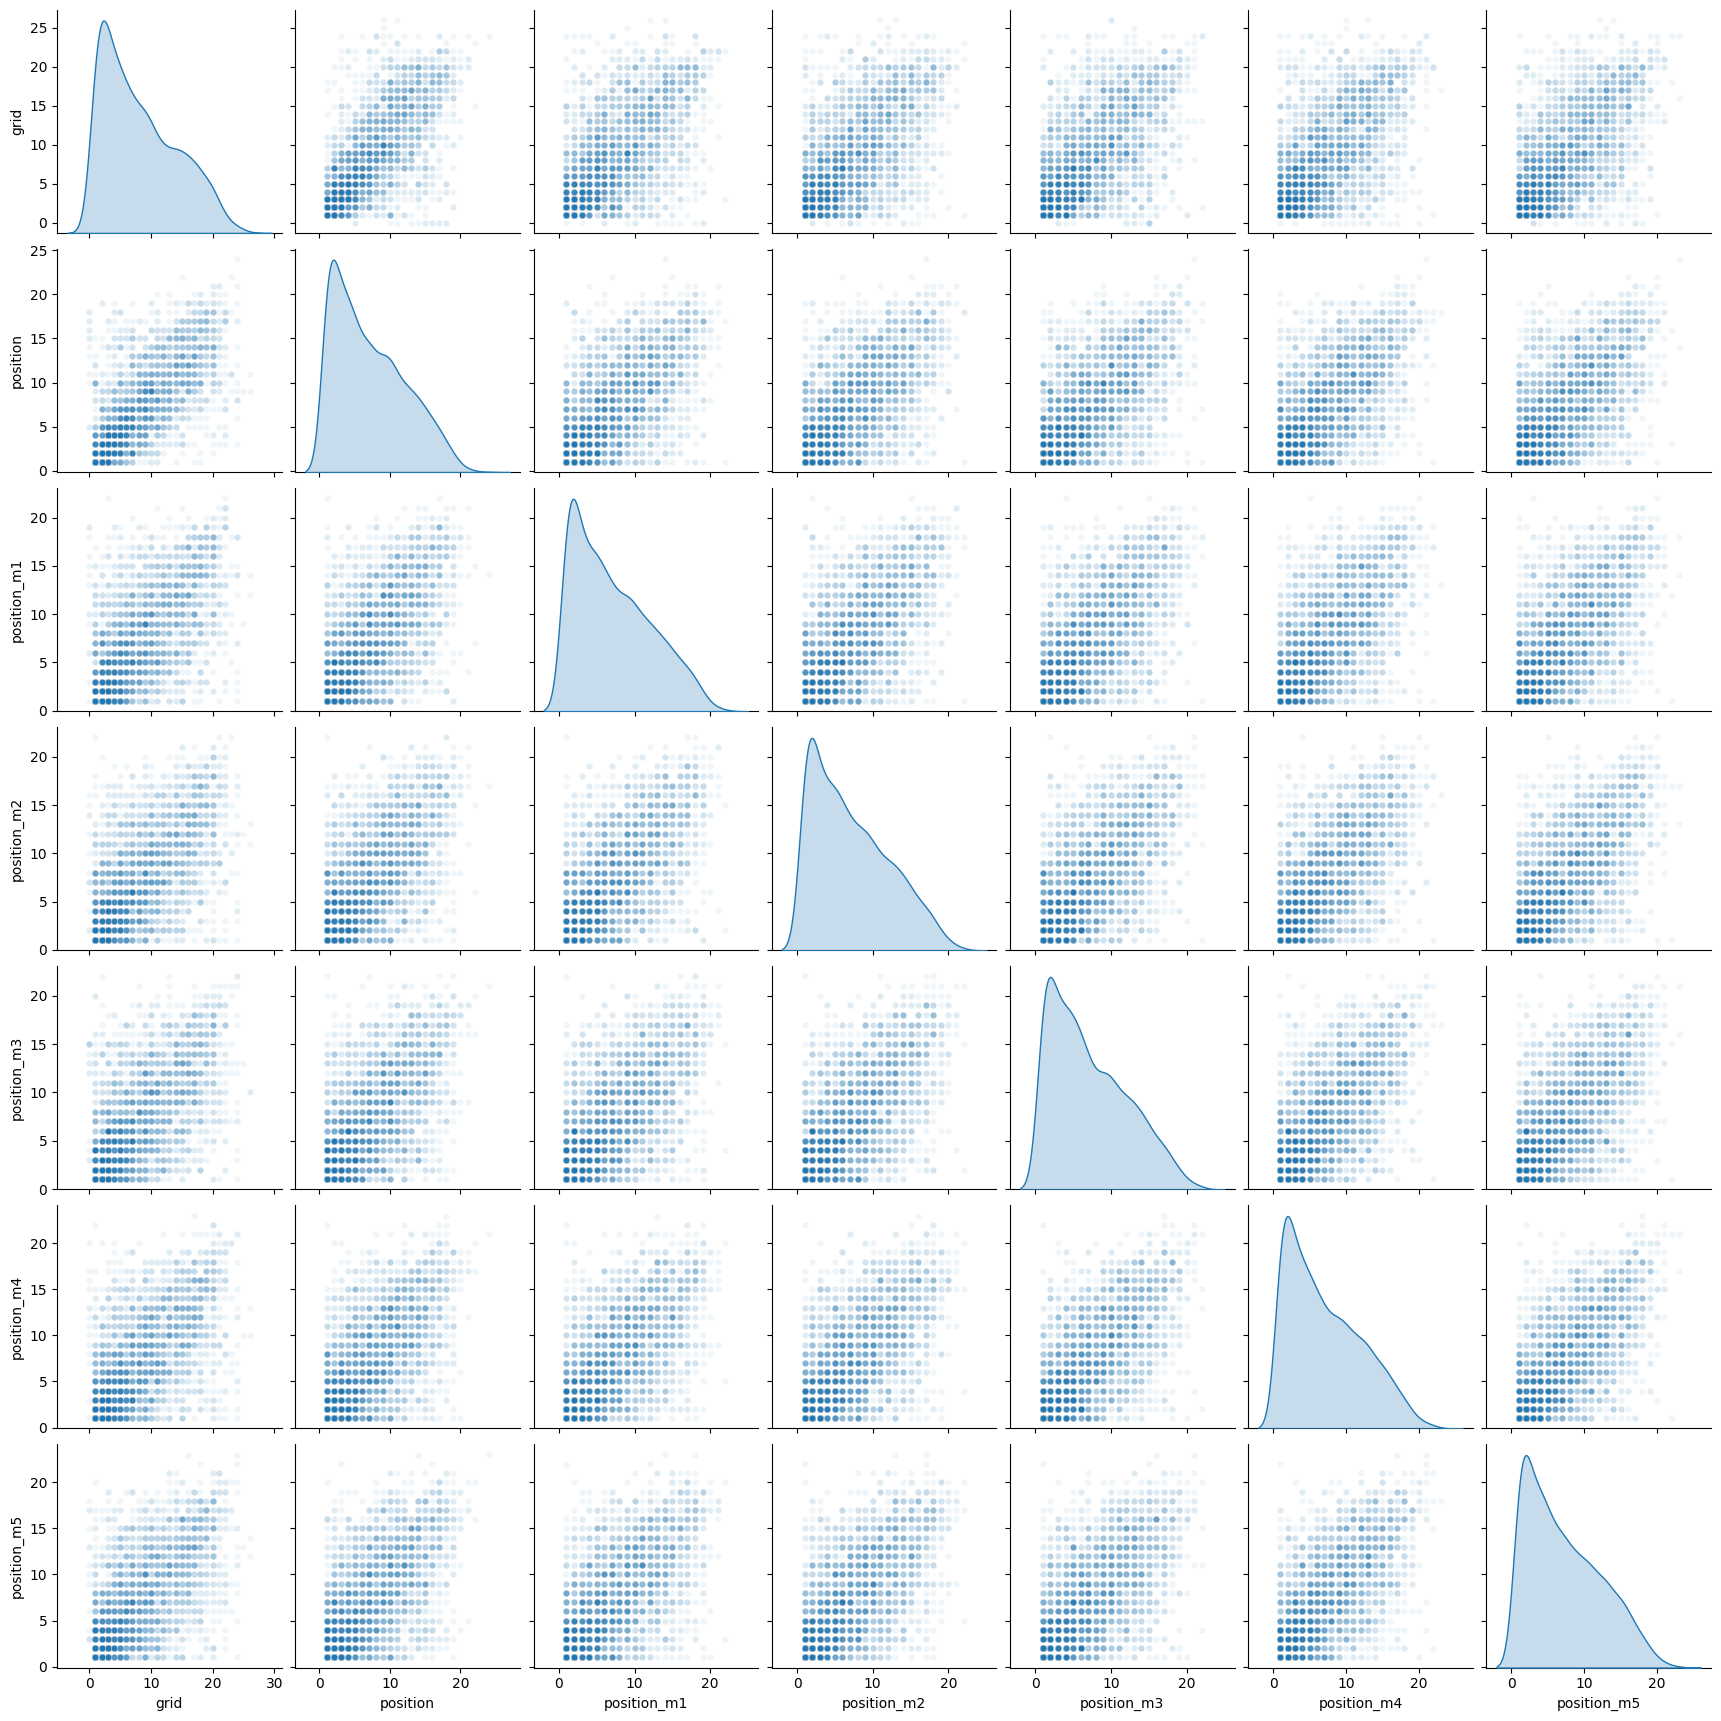

In [27]:
sns.pairplot(results_historic,diag_kind='kde',plot_kws={"s": 20,"alpha":0.07});

In [28]:
# Set a oridnary least squares formula
ols_formula = 'position ~ grid + position_m1 + position_m2 + position_m3 + position_m4 + position_m5'
# create a model
OLS = ols(formula = ols_formula, data = results_historic)
# fit the model
model = OLS.fit()
# display model results
model_results = model.summary()
print(model_results)

                            OLS Regression Results                            
Dep. Variable:               position   R-squared:                       0.601
Model:                            OLS   Adj. R-squared:                  0.601
Method:                 Least Squares   F-statistic:                     787.3
Date:                Sun, 02 Jun 2024   Prob (F-statistic):               0.00
Time:                        17:51:40   Log-Likelihood:                -8045.8
No. Observations:                3137   AIC:                         1.611e+04
Df Residuals:                    3130   BIC:                         1.615e+04
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       0.6477      0.111      5.814      

**Comparing this model to the previous one, we see that taking into account previous race results seems to provide useful information to the model**
The R-squared value has increased from 0.41 to 0.6. While we still dont explain all of the variance in the dataset, the R-squared-adjusted metric doesn't yet penalize this model for excessive complexity.

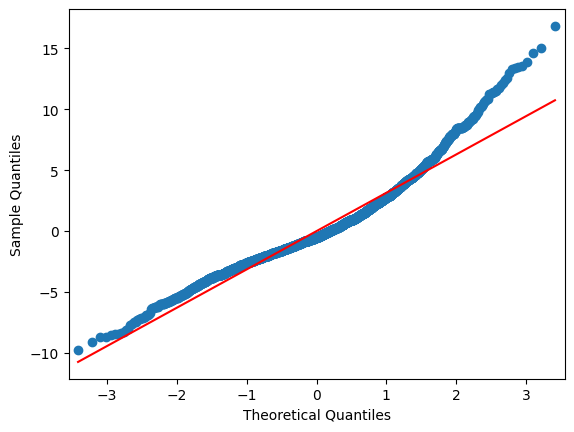

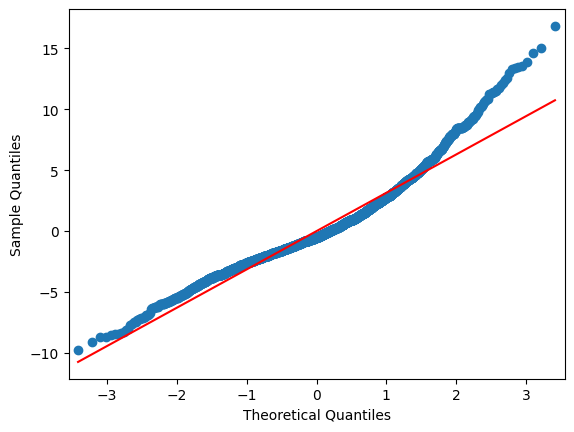

In [29]:
# get residuals from the model
residuals = model.resid
# residuals
# look for normality - all residuals should be normaly distribited. Best visualised by a qq plot
sm.qqplot(residuals, line='s')

<Axes: xlabel='None', ylabel='None'>

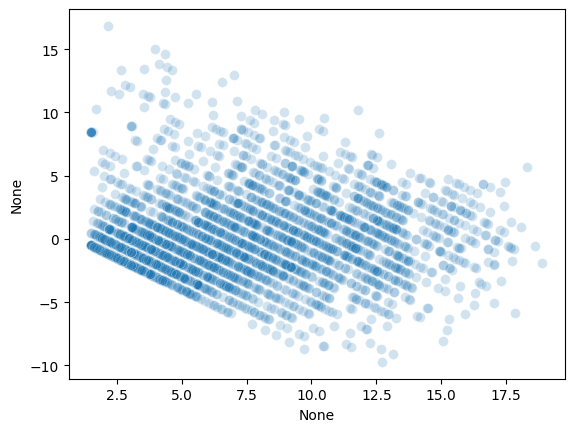

In [30]:
# check for homoscedasticity
sns.scatterplot(x = model.fittedvalues, y = model.resid, alpha = 0.2, s = 50)

## 5. FIND WEATHER DATA
Weather conditions can potentially help some randomness. Some drivers do considerably better in rainy than in dry conditions. For instance in the past few years we had some surprises: Russell in Williams was second in rainy Belgium quali, or Haas got I think a 5th in Brazil a few years back.

So for each race we must find its date, time and location and then query some meteo API for the data. 

In [31]:
from meteostat import Point, Hourly
from datetime import datetime
races_geo = pd.merge(circuits, races, how='inner', left_on = 'circuitId', right_on='circuitId')
races_geo['date'] = pd.to_datetime(races_geo['date'])
races_geo

,circuitId,circuitRef,name_x,location,country,lat,lng,alt,url_x,raceId,...,fp1_date,fp1_time,fp2_date,fp2_time,fp3_date,fp3_time,quali_date,quali_time,sprint_date,sprint_time
0,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,1,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
1,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,18,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
2,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,36,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
3,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,55,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
4,1,albert_park,Albert Park Grand Prix Circuit,Melbourne,Australia,-37.8497,144.9680,10,http://en.wikipedia.org/wiki/Melbourne_Grand_P...,71,...,\N,\N,\N,\N,\N,\N,\N,\N,\N,\N
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1096,77,jeddah,Jeddah Corniche Circuit,Jeddah,Saudi Arabia,21.6319,39.1044,15,http://en.wikipedia.org/wiki/Jeddah_Street_Cir...,1099,...,2023-03-17,13:30:00,2023-03-17,17:00:00,2023-03-18,13:30:00,2023-03-18,17:00:00,\N,\N
1097,78,losail,Losail International Circuit,Al Daayen,Qatar,25.4900,51.4542,\N,http://en.wikipedia.org/wiki/Losail_Internatio...,1051,...,2021-11-19,\N,2021-11-19,\N,2021-11-20,\N,2021-11-20,\N,\N,\N
1098,78,losail,Losail International Circuit,Al Daayen,Qatar,25.4900,51.4542,\N,http://en.wikipedia.org/wiki/Losail_Internatio...,1115,...,2023-10-06,10:30:00,2023-10-07,10:30:00,\N,\N,2023-10-06,14:00:00,2023-10-07,14:30:00
1099,79,miami,Miami International Autodrome,Miami,USA,25.9581,-80.2389,\N,http://en.wikipedia.org/wiki/Miami_Internation...,1078,...,2022-05-06,18:30:00,2022-05-06,21:30:00,2022-05-07,17:00:00,2022-05-07,20:00:00,\N,\N


In [33]:
# silence the warnings
import warnings
warnings.filterwarnings("ignore")

av_rainfall = list();

# for evcery race estimate the rain conditions. This will not work 100% of the time, 
# as sometimes the start of the race time is missing or simply the data is not accurate enough
for idx in range(len(races_geo)):
# get the start date
    if(idx%50 == 0):
        print(100*(idx+1)/len(races_geo))
    start = races_geo['date'].iloc[idx]
    # set the start time to race start time
    if(races_geo['time'].iloc[idx] != '\\N'):
        start = start + pd.Timedelta(hours=int(races_geo['time'].iloc[idx].split(':')[0])-1, minutes=int(races_geo['time'].iloc[idx].split(':')[1]))
        # wihtout any other info we need to assumr the race ends 2h after planned start
        end = start + pd.Timedelta(hours=3)
    else:
        end = start + pd.Timedelta(hours=23)
    # convert to pythons datetime object
    end = end.to_pydatetime()
    start = start.to_pydatetime()
    
    # # # # The point
    point = Point(races_geo['lat'].iloc[idx], races_geo['lng'].iloc[idx])
    
    # # # Get daily data for 2018
    try:
        data = Hourly(point, start, end)
        data = data.normalize()
        data = data.interpolate(6)
        data = data.fetch()
        av_rain = data['prcp'].mean()
        if np.isnan(av_rain):
            av_rainfall.append(0)
        else:
            av_rainfall.append(av_rain)
    except KeyError:
        av_rainfall.append(0)


0.09082652134423251
4.632152588555858
9.173478655767484
13.71480472297911
18.256130790190735
22.797456857402363
27.338782924613987
31.88010899182561
36.421435059037236
40.962761126248864
45.50408719346049
50.04541326067211
54.58673932788374
59.12806539509537
63.66939146230699
68.21071752951862
72.75204359673025
77.29336966394187
81.8346957311535
86.37602179836512
90.91734786557674
95.45867393278837
100.0


Interestingly historical data doesn't match history. For example Monaco 2022 was en extremely wet race. Yet no where can this info be found.
Havibg searched the internet for any more accurate data, I could not find any. 

I am inclined to drop weather data, as it is very unreliable and could break my models.

In [34]:
races_geo['rain'] = av_rainfall
a = races_geo[races_geo['rain'] > 0]
a[a['circuitRef']=="monaco"]['date']

108   2008-05-25
165   2012-05-27
169   2016-05-29
175   2023-05-28
Name: date, dtype: datetime64[ns]

Text(0.5, 0, 'Mean mm of rainfall')

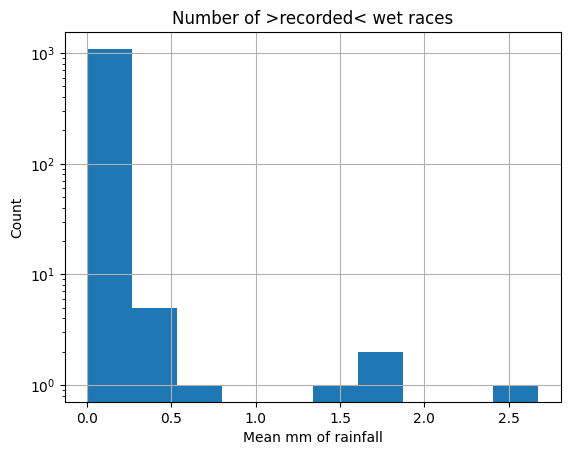

In [35]:
races_geo['rain'].hist()
plt.yscale("log")
plt.title('Number of >recorded< wet races')
plt.ylabel('Count')
plt.xlabel('Mean mm of rainfall')

## 6. Collecting Features into Dataframe

At this stage we are know we would like to include
- [x] Driver (encoded)
- [x] Circuit (encoded)
- [x] Past positions (tune how many past positions give best result)
- [x] Past race tracks (in conjunction with the above)
- [x] Qualifying Position 
- [x] Team (encoded)
- [x] Weather (use it for tuning later)
- [x] Round number (see if it will have any effect)
- [x] Year (see if it will have any effect)
- [ ] overtaking difficulty on given track

In [36]:
# this dataframe from earlier is a good start
# however we need to encode drivers, race locations, add teams and encode them etc.

# remove duplicate columns
features_for_later = features_for_later.loc[:,~features_for_later.columns.duplicated()].copy()

features = pd.merge(features_for_later,races[['raceId','circuitId','round']], how='left', left_on = 'raceId', right_on = 'raceId')

# might need to revisit this later as we are encoding both crashing/failure and not participating as -1.
values = {"position_m1": -1, "position_m2": -1, "position_m3": -1, "position_m4": -1, "position_m5": -1}
features.fillna(value=values, inplace=True)
features.dropna(inplace=True)
features.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30600 entries, 0 to 30710
Data columns (total 16 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   raceId       30600 non-null  int64  
 1   grid         30600 non-null  int64  
 2   position     30600 non-null  int64  
 3   driverId     30600 non-null  int64  
 4   raceId_m1    30600 non-null  float64
 5   raceId_m2    30600 non-null  float64
 6   raceId_m3    30600 non-null  float64
 7   raceId_m4    30600 non-null  float64
 8   raceId_m5    30600 non-null  float64
 9   position_m1  30600 non-null  float64
 10  position_m2  30600 non-null  float64
 11  position_m3  30600 non-null  float64
 12  position_m4  30600 non-null  float64
 13  position_m5  30600 non-null  float64
 14  circuitId    30600 non-null  int64  
 15  round        30600 non-null  int64  
dtypes: float64(10), int64(6)
memory usage: 4.0 MB


In [37]:
# Add constructor and year
con_year = pd.merge(races[['raceId','year']], results[['raceId','driverId','constructorId','grid']], how = 'left', left_on='raceId', right_on='raceId')
features = pd.merge(features,con_year, how='left',left_on = ['raceId','driverId','grid'], right_on=['raceId','driverId','grid'])
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30608 entries, 0 to 30607
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   raceId         30608 non-null  int64  
 1   grid           30608 non-null  int64  
 2   position       30608 non-null  int64  
 3   driverId       30608 non-null  int64  
 4   raceId_m1      30608 non-null  float64
 5   raceId_m2      30608 non-null  float64
 6   raceId_m3      30608 non-null  float64
 7   raceId_m4      30608 non-null  float64
 8   raceId_m5      30608 non-null  float64
 9   position_m1    30608 non-null  float64
 10  position_m2    30608 non-null  float64
 11  position_m3    30608 non-null  float64
 12  position_m4    30608 non-null  float64
 13  position_m5    30608 non-null  float64
 14  circuitId      30608 non-null  int64  
 15  round          30608 non-null  int64  
 16  year           30608 non-null  int64  
 17  constructorId  30608 non-null  float64
dtypes: flo

In [38]:
# replace previous raceId with circuitId
features = pd.merge(features,races[['raceId','circuitId']], how='left', left_on='raceId_m1', right_on='raceId', suffixes = ('','_m1'))
features = pd.merge(features,races[['raceId','circuitId']], how='left', left_on='raceId_m2', right_on='raceId', suffixes = ('','_m2'))
features = pd.merge(features,races[['raceId','circuitId']], how='left', left_on='raceId_m3', right_on='raceId', suffixes = ('','_m3'))
features = pd.merge(features,races[['raceId','circuitId']], how='left', left_on='raceId_m4', right_on='raceId', suffixes = ('','_m4'))
features = pd.merge(features,races[['raceId','circuitId']], how='left', left_on='raceId_m5', right_on='raceId', suffixes = ('','_m5'))
features.head()

,raceId,grid,position,driverId,raceId_m1,raceId_m2,raceId_m3,raceId_m4,raceId_m5,position_m1,...,raceId_m1,circuitId_m1,raceId_m2,circuitId_m2,raceId_m3,circuitId_m3,raceId_m4,circuitId_m4,raceId_m5,circuitId_m5
0,18,1,1,1,52.0,51.0,50.0,49.0,48.0,7.0,...,52,18,51,17,50,16,49,13,48,14
1,18,5,2,2,52.0,51.0,50.0,49.0,48.0,6.0,...,52,18,51,17,50,16,49,13,48,14
2,18,7,3,3,52.0,51.0,50.0,49.0,48.0,4.0,...,52,18,51,17,50,16,49,13,48,14
3,18,11,4,4,52.0,51.0,50.0,49.0,48.0,3.0,...,52,18,51,17,50,16,49,13,48,14
4,18,3,5,5,52.0,51.0,50.0,49.0,48.0,-1.0,...,52,18,51,17,50,16,49,13,48,14


In [39]:
# add rain info
features = pd.merge(features,races_geo[['raceId','rain']],how='left', left_on='raceId',right_on='raceId')

In [46]:
# add overtaking difficulty score
features = pd.merge(features,overtakes_per_circuit_named[['circuitId','norm_overtakes']],how='left', left_on='circuitId',right_on='circuitId')

In [47]:
# clean up

features = features.loc[:,~features.columns.duplicated()].copy()

# features.drop(['raceId', 'raceId_m1', 'raceId_m2', 'raceId_m3', 'raceId_m4', 'raceId_m5'], axis=1, inplace=True)
features.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30608 entries, 0 to 30607
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   grid            30608 non-null  int64  
 1   position        30608 non-null  int64  
 2   driverId        30608 non-null  int64  
 3   position_m1     30608 non-null  float64
 4   position_m2     30608 non-null  float64
 5   position_m3     30608 non-null  float64
 6   position_m4     30608 non-null  float64
 7   position_m5     30608 non-null  float64
 8   circuitId       30608 non-null  int64  
 9   round           30608 non-null  int64  
 10  year            30608 non-null  int64  
 11  constructorId   30608 non-null  float64
 12  circuitId_m1    30608 non-null  int64  
 13  circuitId_m2    30608 non-null  int64  
 14  circuitId_m3    30608 non-null  int64  
 15  circuitId_m4    30608 non-null  int64  
 16  circuitId_m5    30608 non-null  int64  
 17  rain            30608 non-null 

In [48]:
features.to_csv('F1_features.csv')